In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

from molent.graphs import ged, cost_matrix

In [2]:
def draw_graph(G, node_attr=None):
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, width=6)

    # node labels
    node_labels = {n: n for n in G}
    if node_attr:
        node_labels = nx.get_node_attributes(G, node_attr)
        
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    
    return ax

# Example 1

Taken from 
> Riesen, K. (2015). Bipartite Graph Edit Distance. In: Structural Pattern Recognition with Graph Edit Distance. Advances in Computer Vision and Pattern Recognition. Springer, Cham. https://doi.org/10.1007/978-3-319-27252-8_3

In [3]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4], mu=1)
G1.nodes[2]['mu'] = 2
G1.nodes[4]['mu'] = 3
G1.add_edges_from([(1,2), (2,3), (2,4), (3,4)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3], mu=2)
G2.nodes[1]['mu'] = 3
G2.add_edges_from([(1,2), (2,3)])

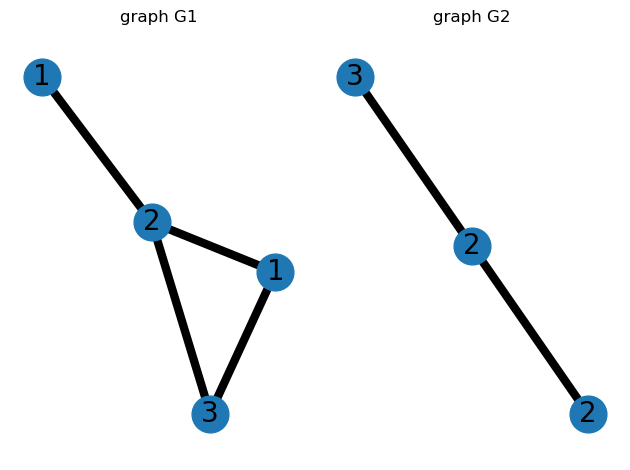

In [4]:
plt.subplot(121)
plt.title("graph G1")
draw_graph(G1, node_attr='mu')

plt.subplot(122)
plt.title("graph G2")
draw_graph(G2, node_attr='mu')

plt.show()

In [5]:
# True GED, should be 4
nx.graph_edit_distance(G1, G2, node_subst_cost=lambda a,b: np.abs(a['mu'] - b['mu']))

4.0

In [6]:
# approximated GED using assignment edit distance, should be 6
ged(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']))

6.0

In [7]:
# enriched cost matrix C* as given below Eq. (10)
cost_matrix(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']))

array([[ 2.,  2.,  1.,  2., inf, inf, inf],
       [ 3.,  1.,  2., inf,  4., inf, inf],
       [ 3.,  1.,  2., inf, inf,  3., inf],
       [ 1.,  1.,  2., inf, inf, inf,  3.],
       [ 2., inf, inf,  0.,  0.,  0.,  0.],
       [inf,  3., inf,  0.,  0.,  0.,  0.],
       [inf, inf,  2.,  0.,  0.,  0.,  0.]])

# Example 2

In [8]:
G1 = nx.cycle_graph(6)
nx.set_edge_attributes(G1, 1., name='weight')

G2 = nx.cycle_graph(6)
nx.set_edge_attributes(G2, 1.5, name='weight')

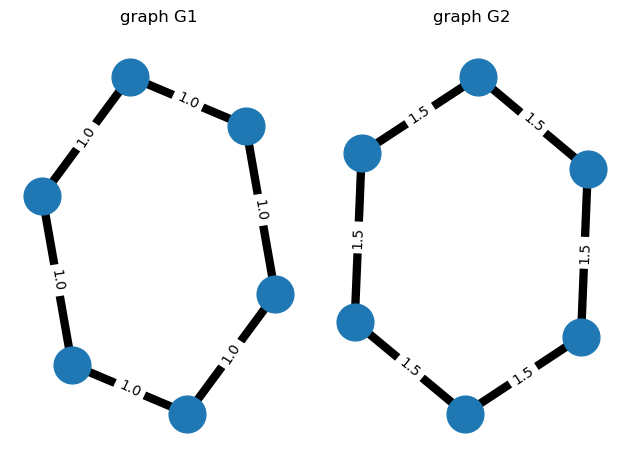

In [9]:
plt.subplot(121)
plt.title("graph G1")
draw_graph(G1, node_attr='mu')

plt.subplot(122)
plt.title("graph G2")
draw_graph(G2, node_attr='mu')

plt.show()

In [10]:
# True GED, should be 6 since each edge has to be substituted
nx.graph_edit_distance(G1, G2, edge_match=lambda a,b: a['weight'] == b['weight'])

6.0

In [11]:
# approximated GED using assignment edit distance, should be 12 as each edge is counted twice
ged(G1, G2, edge_sub=lambda a,b: (1-int(a['weight'] == b['weight'])))

12.0

In [12]:
# approximated GED using assignment edit distance, should be 6
ged(G1, G2, edge_sub=lambda a,b: (1-int(a['weight'] == b['weight']))/2)

6.0

# Example 3

In [13]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3], mu=1)
G1.add_edges_from([(1,2), (2,3)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3], mu=1)
G2.add_edges_from([(1,2), (2,3)])
G2.nodes[2]['mu'] = 2

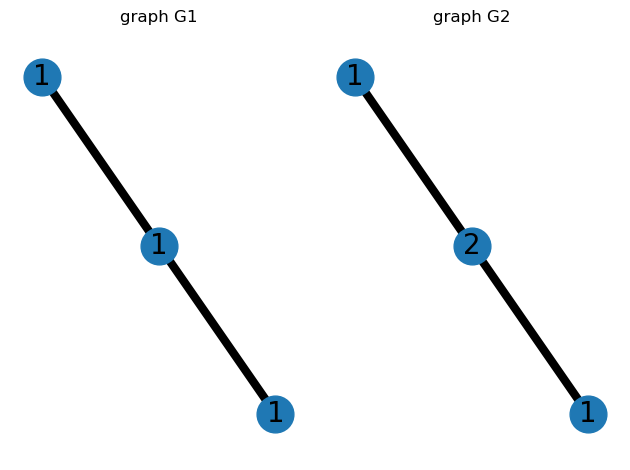

In [14]:
plt.subplot(121)
plt.title("graph G1")
draw_graph(G1, node_attr='mu')

plt.subplot(122)
plt.title("graph G2")
draw_graph(G2, node_attr='mu')

plt.show()

In [15]:
# True GED, should be 1
nx.graph_edit_distance(G1, G2, node_subst_cost=lambda a,b: np.abs(a['mu'] - b['mu']))

1.0

In [16]:
# approximated GED using assignment edit distance
ged(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']))

1.0

In [17]:
# enriched cost matrix C*
CM = cost_matrix(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']))
CM

array([[ 0.,  2.,  0.,  2., inf, inf],
       [ 1.,  1.,  1., inf,  3., inf],
       [ 0.,  2.,  0., inf, inf,  2.],
       [ 2., inf, inf,  0.,  0.,  0.],
       [inf,  3., inf,  0.,  0.,  0.],
       [inf, inf,  2.,  0.,  0.,  0.]])

In [18]:
# True GED with the constraint that node 1 <-> node 2, should be 3
nx.graph_edit_distance(G1, G2, node_subst_cost=lambda a,b: np.abs(a['mu'] - b['mu']),
                          roots=(1,2))

3.0

In [19]:
# approximated GED using assignment edit distance
ged(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']), roots=(1,2))

3.0

In [20]:
# enriched cost matrix C*
CM = cost_matrix(G1, G2, node_sub=lambda a,b: np.abs(a['mu'] - b['mu']), roots=(1,2))
CM

array([[inf,  2., inf, inf, inf, inf],
       [ 1., inf,  1., inf,  3., inf],
       [ 0., inf,  0., inf, inf,  2.],
       [ 2., inf, inf,  0.,  0.,  0.],
       [inf, inf, inf,  0.,  0.,  0.],
       [inf, inf,  2.,  0.,  0.,  0.]])